# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
    
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | Worst experience of my life...
1,✅ Trip Verified | Due to code sharing with Ca...
2,✅ Trip Verified | LHR check in was quick at t...
3,✅ Trip Verified | I wouldn't recommend Britis...
4,✅ Trip Verified | Absolutely horrible experie...
...,...
995,✅ Trip Verified | I have flown British Airways...
996,✅ Trip Verified | We can not fault the new 'Cl...
997,✅ Trip Verified | Very disappointing experien...
998,✅ Trip Verified | Calgary to London. Cabin fu...


In [ ]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
import csv

with open('BA_reviews.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = []
    for row in reader:

        text = row[1].replace('✅ Trip Verified | ', '').replace('Not Verified | ', '')
        rows.append([text])

with open('output_file.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)

In [ ]:

from textblob import TextBlob
with open('output_file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = []
    for row in reader:
        text = row[0]
        blob = TextBlob(text)
        sentiment = blob.sentiment.polarity
        rows.append([text, sentiment])

with open('sentiment_scores.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(rows)
    

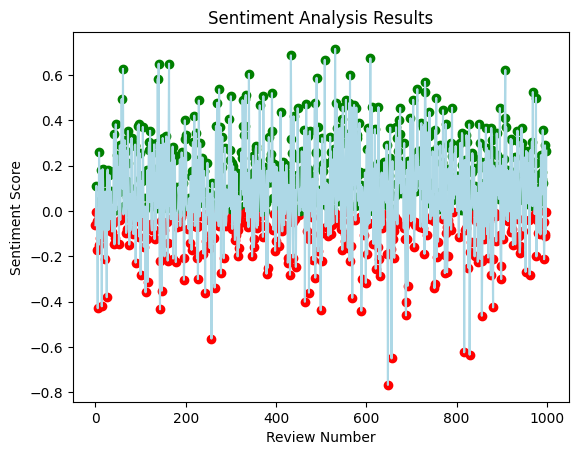

In [ ]:
import csv
import matplotlib.pyplot as plt

with open('sentiment_scores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    scores = []
    for row in reader:
        score = float(row[1])
        scores.append(score)

colors = ['red' if score < 0 else 'green' if score > 0 else 'lighgray' for score in scores]

plt.plot(scores, color='lightblue')
for i, score in enumerate(scores):
    if score < 0:
        plt.scatter(i, score, color='red')
    elif score > 0:
        plt.scatter(i, score, color='green')

plt.xlabel('Review Number')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis Results')
plt.show()


In [ ]:
pip install --upgrade wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


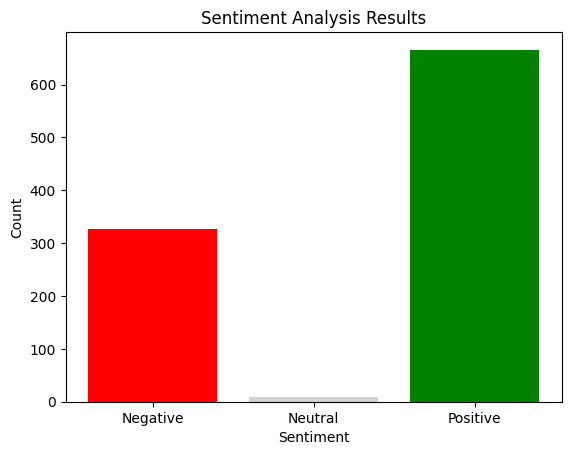

In [ ]:
import csv
import matplotlib.pyplot as plt

with open('sentiment_scores.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    scores = []
    for row in reader:
        score = float(row[1])
        scores.append(score)

positive_count = sum(score > 0 for score in scores)
negative_count = sum(score < 0 for score in scores)
neutral_count = len(scores) - positive_count - negative_count

counts = [negative_count, neutral_count, positive_count]
labels = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'lightgray', 'green']

plt.bar(labels, counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Analysis Results')

plt.show()


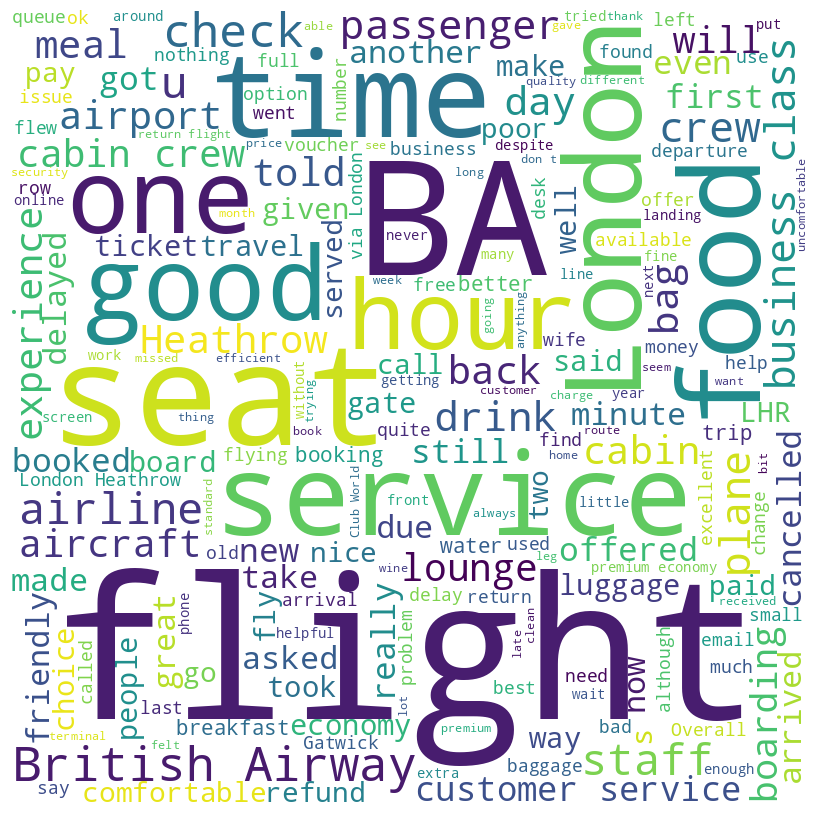

In [ ]:
import csv
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read in the reviews
with open('output_file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    reviews = []
    for row in reader:
        reviews.append(row[0])

# Define the words to highlight
highlight_words = ['delay', 'food', 'service', 'time']

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(reviews))
# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


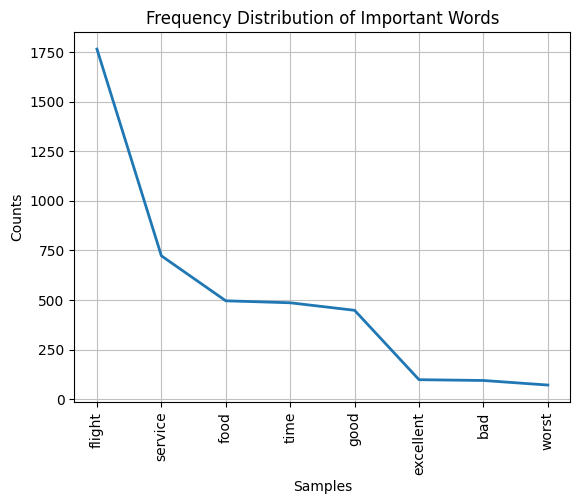

<Axes: title={'center': 'Frequency Distribution of Important Words'}, xlabel='Samples', ylabel='Counts'>

In [ ]:
import csv
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Define the customized words
customized_words = ["flight", "food", "time", "service", "bad", "worst", "good", "excellent"]

# Read the csv file
with open('output_file.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip header row
    reviews = []
    for row in reader:
        review = row[0]
        reviews.append(review)

# Tokenize the reviews
tokens = [word_tokenize(review.lower()) for review in reviews]

# Calculate frequency distribution of the customized words
freq_dist = FreqDist([token for review in tokens for token in review if token in customized_words])

# Plot the frequency distribution
freq_dist.plot(30, title="Frequency Distribution of Important Words")
